<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# **Hands-on Practice Lab: Model Evaluation and Refinement**

Estimated time needed: **45** minutes

In this lab, you will use the skills acquired throughout the module, and try to refine your model's performance in predicting the price of a laptop, given the attribute values.


# Objectives

After completing this lab you will be able to:

 - Use training, testing and cross validation to improve the performance of the dataset. 
 - Identify the point of overfitting of a model
 - Use Ridge Regression to identify the change in performance of a model based on its hyperparameters
 - Use Grid Search to identify the best performing model using different hyperparameters


# Setup


For this lab, we will be using the following libraries:

* `skillsnetwork` for downloading the dataset
*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `%pip` in the code cell below.


The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


In [ ]:
#import piplite
#await piplite.install('seaborn')

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [1]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

# Importing the Dataset

Run the cell below to donwload the dataset into the console.


In [ ]:
#If the code is not available, download it
#from pyodide.http import pyfetch

#async def download(url, filename):
#    response = await pyfetch(url)
#    if response.status == 200:
#        with open(filename, "wb") as f:
#            f.write(await response.bytes())

In [ ]:
#filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'

In [2]:
#await download(filepath, "laptops.csv")
file_name="laptops_CLEANED_NO_INDEX.csv"

In [3]:
df = pd.read_csv(file_name, header=0)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


Import the data set into a data frame.


In [ ]:
#filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'
#df = pd.read_csv(filepath, header=None)

Print the value of df.head(). 


In [4]:
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Weight_pound,Screen_Size_inch,CPU_frequency_norm,Price_binned,Screen-Full_HD,Screen-IPS_Panel
0,Acer,4,2,1,5,35.56,1.6,8,256,1.60,978,3.53,14.0,0.551724,Low,False,True
1,Dell,3,1,1,3,39.62,2.0,4,256,2.20,634,4.85,15.6,0.689655,Low,True,False
2,Dell,3,1,1,7,39.62,2.7,8,256,2.20,946,4.85,15.6,0.931034,Low,True,False
3,Dell,4,2,1,5,33.78,1.6,8,128,1.22,1244,2.69,13.3,0.551724,Low,False,True
4,HP,4,2,1,7,39.62,1.8,8,256,1.91,837,4.21,15.6,0.620690,Low,True,False


Drop the two unnecessary columns that have been added into the file, 'Unnamed: 0' and 'Unnamed: 0.1'. Use drop to delete these columns.


In [ ]:
#df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

# Task 1 : Using Cross validation to improve the model

Divide the dataset into x_data and y_data parameters. Here y_data is the "Price" attribute, and x_data has all other attributes in the data set.


In [5]:
#First, we need to divide our data into x and y variables
y_data = df['Price']
x_data=df.drop('Price',axis=1)

Split the data set into training and testing subests such that you reserve 10% of the data set for testing purposes.


In [6]:
#Divide the data into training and testing data, where the testing data is 10% of the total data

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=1)

In [7]:
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 24
number of training samples: 214


Create a single variable linear regression model using "CPU_frequency" parameter. Print the R^2 value of this model for the training and testing subsets.


In [8]:
#Create a linear regression object
lre=LinearRegression()

#Fit the model using the feature "CPU_frequency"
lre.fit(x_train[['CPU_frequency']], y_train)

#Calculate the R^2 on the test data
print("The R^2 on the test data is: ", lre.score(x_test[['CPU_frequency']], y_test))

#Calculate the R^2 on the training data
print("The R^2 on the training data is: ", lre.score(x_train[['CPU_frequency']], y_train))

The R^2 on the test data is:  -0.06599437350393766
The R^2 on the training data is:  0.14829792099817973


Run a 4-fold cross validation on the model and print the mean value of R^2 score along with its standard deviation.


In [9]:
#Using cross validation, we'll use 4 folds and calculare the R^2 for each fold
Rcross = cross_val_score(lre, x_data[['CPU_frequency']], y_data, cv=4)

#The mean of the folds will be the mean of the R^2 values
print("The mean of the folds are: ", Rcross.mean(), " and the standard deviation is: ", Rcross.std())

The mean of the folds are:  -0.16109232388595138  and the standard deviation is:  0.38495797866647175


# Task 2: Overfitting

Split the data set into training and testing components again, this time reserving 50% of the data set for testing.


In [10]:
#This time, the datasets for testing and training will be split into 50% each
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_data, y_data, test_size=0.5, random_state=0)

#Print the number of test and training samples
print("number of test samples :", x_test_1.shape[0])
print("number of training samples:",x_train_1.shape[0])

number of test samples : 119
number of training samples: 119


To identify the point of overfitting the model on the parameter "CPU_frequency", you'll need to create polynomial features using the single attribute. 
You need to evaluate the R^2 scores of the model created using different degrees of polynomial features, ranging from 1 to 5. Save this set of values of R^2 score as a list.


In [12]:
#We need to evaluate the R^2 given one feature: "CPU_frequency". Also, the model has to be evaluated using ranging from 1 to 5
lre = LinearRegression()
R_squared_test = []
orders = [1, 2, 3, 4, 5]

for power in orders:
    #Create a polynomial object with the order of the polynomial being the power
    pr = PolynomialFeatures(degree=power)
    
    #Transform the training and testing data into a polynomial of the order specified
    x_train_pr = pr.fit_transform(x_train_1[['CPU_frequency']])
    x_test_pr = pr.fit_transform(x_test_1[['CPU_frequency']])
    
    #Fit the model using the transformed training data
    lre.fit(x_train_pr, y_train_1)
    
    #Calculate the R^2 using the transformed testing data
    R_squared_test.append(lre.score(x_test_pr, y_test_1))

#Print each R^2 value
print(R_squared_test)

[0.05322174176198102, -0.02692081867900975, 0.05156345792559902, -0.9948137915499093, -1.3759360955598723]


Plot the values of R^2 scores against the order. Note the point where the score drops.


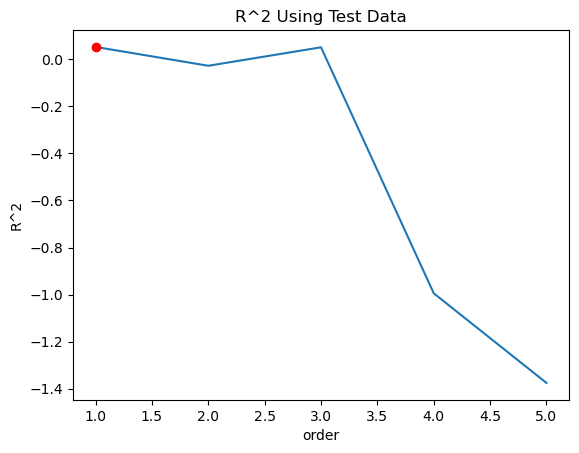

In [13]:
#Plot the R^2 values
plt.plot(orders, R_squared_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

#Identify the order that gives the highest R^2 value
best_order = R_squared_test.index(max(R_squared_test))

#Plot the best-order-point
plt.plot(orders[best_order], R_squared_test[best_order], 'ro')
plt.show()

# Task 3 : Ridge Regression

Now consider that you have multiple features, i.e. 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU' and 'Category'. Create a polynomial feature model that uses all these parameters with degree=2. Also create the training and testing attribute sets.


In [15]:
#Create a polynomal feature model that uses "CPU_frequency", "RAM_GB", "Storage_GB_SSD", "CPU_core", "OS", "GPU", "Category"
pr = PolynomialFeatures(degree=2)

#Transform the training and testing data into a polynomial of the order specified
x_train_pr = pr.fit_transform(x_train_1[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
x_test_pr = pr.fit_transform(x_test_1[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])

print("Data sets transformed into a polynomial of degree 2")

Data sets transformed into a polynomial of degree 2


<details><summary>Click here for the solution</summary>

```python
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
x_test_pr=pr.fit_transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
```

</details>


Create a Ridge Regression model and evaluate it using values of the hyperparameter alpha ranging from 0.001 to 1 with increments of 0.001. 
Create a list of all Ridge Regression R^2 scores for training and testing data. 


In [16]:
#Create an alpha variable that will be used to find the best alpha value, from 0.001 to 1 whit increments of 0.001
alphas = np.arange(0.001, 1, 0.001)

#Create a ridge regression object
ridge = Ridge()

#Create pbar object to show progress
pbar = tqdm(alphas)

#Create 2 lists that will be used to store the R^2 values for the training and testing data
R_squared_train = []
R_squared_test = []

#Iterate through each alpha value
for alpha in pbar:
    #Set the alpha value for the ridge regression object
    ridge.set_params(alpha=alpha)
    
    #Fit the model using the transformed training data
    ridge.fit(x_train_pr, y_train_1)

    #Set the description of the progress bar
    #pbar.set_description("Processing %s" % alpha)

    #Set post fix to show the current R^2 value
    pbar.set_postfix(R_squared=ridge.score(x_test_pr, y_test_1))
    
    #Calculate the R^2 using the transformed training data
    R_squared_train.append(ridge.score(x_train_pr, y_train_1))
    
    #Calculate the R^2 using the transformed testing data
    R_squared_test.append(ridge.score(x_test_pr, y_test_1))

100%|██████████| 999/999 [00:01<00:00, 799.42it/s, R_squared=0.394]


Plot the R^2 values for training and testing sets with respect to the value of alpha


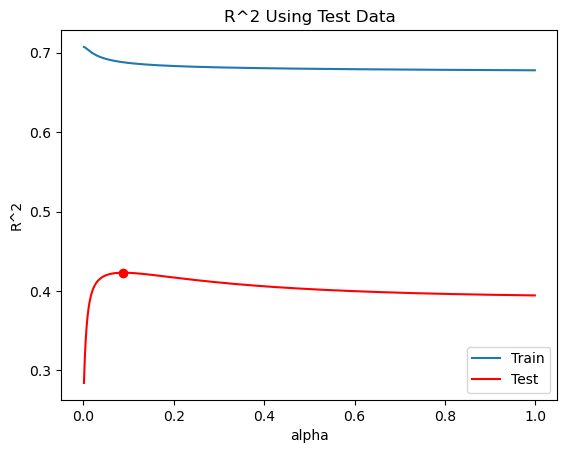

In [17]:
#Plot the R^2 values for the training and testing data
plt.plot(alphas, R_squared_train, label='Train')
plt.plot(alphas, R_squared_test, 'r', label='Test')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.legend()

#Identify the alpha value that gives the highest R^2 value
best_alpha = R_squared_test.index(max(R_squared_test))

#Plot the best-alpha-point
plt.plot(alphas[best_alpha], R_squared_test[best_alpha], 'ro')
plt.show()

Now, all the process above will be repeated using the dataset splited into 50% training and 50% testing subsets.

Data sets transformed into a polynomial of degree 2


100%|██████████| 999/999 [00:01<00:00, 727.43it/s, R_squared=0.34] 


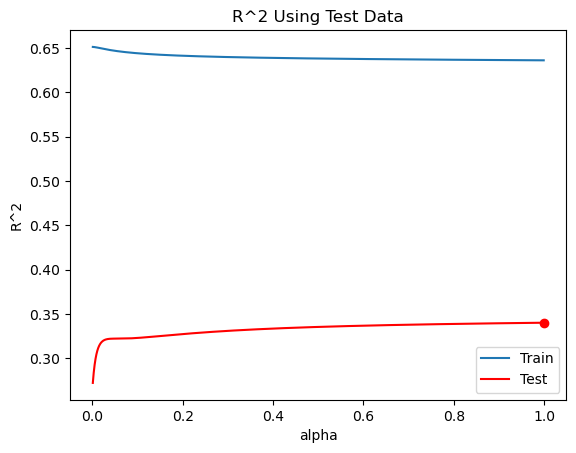

In [25]:
#Create a polynomal feature model that uses "CPU_frequency", "RAM_GB", "Storage_GB_SSD", "CPU_core", "OS", "GPU", "Category"
pr_v2 = PolynomialFeatures(degree=2)

#Transform the training and testing data into a polynomial of the order specified
x_train_pr_2 = pr_v2.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
x_test_pr_2 = pr_v2.fit_transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])

print("Data sets transformed into a polynomial of degree 2")

#Create an alpha variable that will be used to find the best alpha value, from 0.001 to 1 whit increments of 0.001
alphas_v2 = np.arange(0.001, 1, 0.001)

#Create a ridge regression object
ridge = Ridge()

#Create pbar object to show progress
pbar = tqdm(alphas_v2)

#Create 2 lists that will be used to store the R^2 values for the training and testing data
R_squared_train_2 = []
R_squared_test_2 = []

#Iterate through each alpha value
for alpha in pbar:
    #Set the alpha value for the ridge regression object
    ridge.set_params(alpha=alpha)
    
    #Fit the model using the transformed training data
    ridge.fit(x_train_pr_2, y_train)

    #Set the description of the progress bar
    #pbar.set_description("Processing %s" % alpha)

    #Set post fix to show the current R^2 value
    pbar.set_postfix(R_squared=ridge.score(x_test_pr_2, y_test))
    
    #Calculate the R^2 using the transformed training data
    R_squared_train_2.append(ridge.score(x_train_pr_2, y_train))
    
    #Calculate the R^2 using the transformed testing data
    R_squared_test_2.append(ridge.score(x_test_pr_2, y_test))

#Plot the R^2 values for the training and testing data
plt.plot(alphas_v2, R_squared_train_2, label='Train')
plt.plot(alphas_v2, R_squared_test_2, 'r', label='Test')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.legend()

#Identify the alpha value that gives the highest R^2 value
best_alpha_v2 = R_squared_test_2.index(max(R_squared_test_2))

#Plot the best-alpha-point
plt.plot(alphas_v2[best_alpha_v2], R_squared_test_2[best_alpha_v2], 'ro')
plt.show()

# Task 4: Grid Search

Using the raw data and the same set of features as used above, use GridSearchCV to identify the value of alpha for which the model performs best. 
Assume the set of alpha values to be used as
```math
{0.0001, 0.001, 0.01, 0.1, 1, 10}
```


In [19]:
#Create a GridSearchCV object
parameters1= [{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}]

Create a Ridge instance and run Grid Search using a 4 fold cross validation.


In [20]:
#Ridge regression instance
RR=Ridge()

#Create a ridge grid search object
Grid1 = GridSearchCV(RR, parameters1,cv=4)

Fit the Grid Search to the training data.


In [21]:
#Fit the model using the dataset splited 90-10
Grid1.fit(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], 
          y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                    1000]}])

<details><summary>Click here for the solution</summary>

```python
Grid1.fit(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_train)
```
</details>


Print the R^2 score for the test data using the estimator that uses the derived optimum value of alpha.


In [22]:
#Save the best estimator
BestRR=Grid1.best_estimator_

#Print the R^2 value for the best estimator
print("The R^2 value for the best estimator is: ", BestRR.score(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_test))

#Print the alpha value for the best estimator
print("The alpha value for the best estimator is: ", BestRR.alpha)

The R^2 value for the best estimator is:  0.2468647998591723
The alpha value for the best estimator is:  1


# Congratulations! You have completed the lab


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-16|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-19|0.2|Vicky Kuo|Reviewed and Revised|


Copyright © 2023 IBM Corporation. All rights reserved.
